In [237]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, KFold, cross_val_predict, validation_curve
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse,r2_score as r2,mean_absolute_error as mae
from sklearn.preprocessing import StandardScaler, minmax_scale
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import statsmodels.formula.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [238]:
social = pd.read_csv('Social_Network_Ads.csv', delimiter = ';')

In [239]:
social.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [240]:
social.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [241]:
social.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [242]:
diff = 257 - 143 
diff

114

In [243]:
social = social.append(social[social['Purchased'] == 1].sample(n=diff,replace=True))

In [244]:
social.Purchased.value_counts()

1    257
0    257
Name: Purchased, dtype: int64

In [245]:
social = social.drop('User ID', axis= 1)

In [246]:
social.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [247]:
social.shape

(514, 4)

In [248]:
LE = LabelEncoder()
social['Gender'] = LE.fit_transform(social['Gender'])

In [249]:
social.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [250]:
social['Age'] = minmax_scale(social[['Age']])
social['EstimatedSalary'] = minmax_scale(social[['EstimatedSalary']])


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64.
  


In [251]:
social.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,0.023810,0.029630,0
1,1,0.404762,0.037037,0
2,0,0.190476,0.207407,0
3,0,0.214286,0.311111,0
4,1,0.023810,0.451852,0


In [252]:
X = social.iloc[:, :-1]
Y = social.iloc[:, -1]
X.head() , Y.head()

(   Gender       Age  EstimatedSalary
 0       1  0.023810         0.029630
 1       1  0.404762         0.037037
 2       0  0.190476         0.207407
 3       0  0.214286         0.311111
 4       1  0.023810         0.451852, 0    0
 1    0
 2    0
 3    0
 4    0
 Name: Purchased, dtype: int64)

In [253]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.20)

In [254]:
LR = LogisticRegression()
LR.fit(xtrain, ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [255]:
LR.predict(xtrain)

array([1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,

In [256]:
score = accuracy_score(ytrain, LR.predict(xtrain))
score

0.8686131386861314

In [257]:
LR.predict(xtest)

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

In [258]:
score = accuracy_score(ytest, LR.predict(xtest))
score

0.7669902912621359

# CV

In [275]:
KNN = KNeighborsClassifier()
param_name = 'n_neighbors'
param_range = list(range(1, 20))
train_scores_knn, test_scores_knn = validation_curve(KNN, X, Y, param_name, param_range, cv = 10)

In [276]:
train_mean_scores_knn = np.mean(train_scores_knn, axis=1)
test_mean_scores_knn = np.mean(test_scores_knn, axis=1)

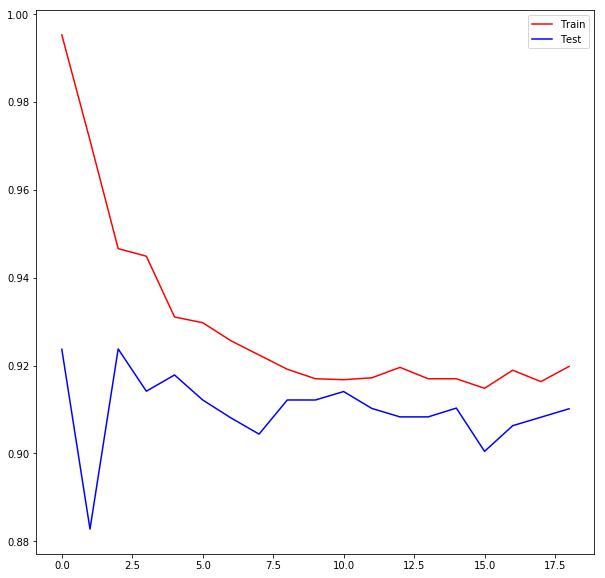

In [277]:
plt.figure(figsize=(10, 10))
plt.plot(train_mean_scores_knn, color = 'red')
plt.plot(test_mean_scores_knn, color = 'blue')
plt.legend(['Train', 'Test'])


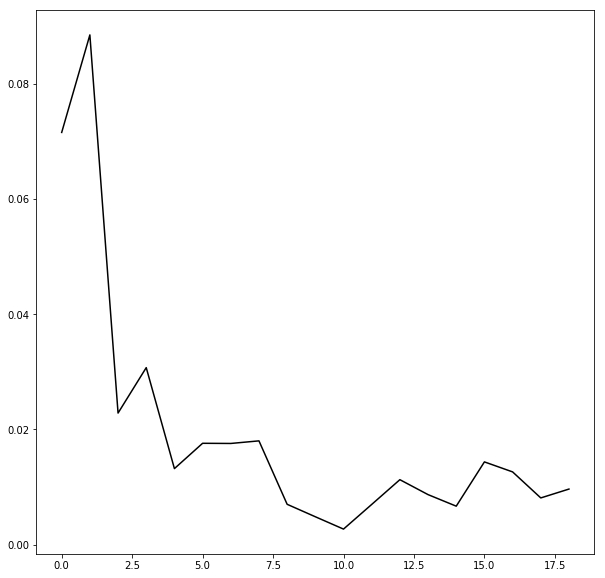

In [264]:
diff = train_mean_scores - test_mean_scores
plt.figure(figsize=(10, 10))
plt.plot(diff, color = 'black')

In [297]:
i = np.argmin(np.array(diff))
test_mean_scores_knn[i]

0.9140769230769232

# Logistic Regression

In [308]:
LR = LogisticRegression()
param_name = 'random_state' 
param_range = [0]
train_scores_lr, test_scores_lr = validation_curve(LR, X, Y, param_name, param_range, cv = 10)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [309]:
train_mean_scores_lr = np.mean(train_scores_lr, axis=1)
test_mean_scores_lr = np.mean(test_scores_lr, axis=1)

In [310]:
test_mean_scores_lr

array([0.82930769])